# Train YOLOv5 on football players detection

In this notebook, we train [YOLOv8](https://github.com/ultralytics/ultralytics) on the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) from Roboflow.

The dataset contains 255 images of football games. The players, referees, goalkeeper and ball are labeled.


Setup environment

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 15070, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 15070 (delta 32), reused 60 (delta 29), pack-reused 15001
Receiving objects: 100% (15070/15070), 14.10 MiB | 21.77 MiB/s, done.
Resolving deltas: 100% (10323/10323), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.6 MB/s eta 0:00:00


In [2]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=a968dfabd0d5de7283ae90e13c5da212f132fd6d9478f25ab78304f55826f0b0
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

In [3]:
from pathlib import Path
from roboflow import Roboflow
import cv2
import numpy as np
import matplotlib.pyplot as plt

Download Dataset

In [4]:
rf = Roboflow(api_key="UxApJs5oZUkmngdc3qdV")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(4).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to football-players-detection-4 in yolov5pytorch:: 100%|██████████| 522/522 [00:00<00:00, 1792.68it/s]


In [5]:
path_dataset = Path("football-players-detection-4")
path_yaml = path_dataset/ "data.yaml"

In [6]:
len_train = len(list((path_dataset/ "train/images").iterdir()))
len_val = len(list((path_dataset/ "valid/images").iterdir()))
len_test = len(list((path_dataset/ "test/images").iterdir()))
print(f"Number of examples: train-{len_train}, val-{len_val}, test-{len_test}")

Number of examples: train-204, val-38, test-13


## Train YOLOv5

For the training we opted for yolov5l and image size 640

In [7]:
!python train.py --img 1280 --batch 8 --epochs 300 --data {dataset.location}/data.yaml --weights yolov5m.pt --cache

train: weights=yolov5m.pt, cfg=, data=/content/yolov5/football-players-detection-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=8, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-74-gd02ee60 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamm

In [19]:
!python val.py --weights runs/train/exp/weights/best.pt --data {dataset.location}/data.yaml --img 1280

val: data=/content/yolov5/football-players-detection-4/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=1280, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-74-gd02ee60 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /content/yolov5/football-players-detection-4/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:05<00:00,  2.54s/it]
                   all         38        905      0.909      0.862      0.892      0.675
                  ball         38         35      0.953       0.58

## Display prediction on test images

In [14]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 1280 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/football-players-detection-4/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-74-gd02ee60 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
image 1/13 /content/yolov5/football-players-detection-4/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 47.1ms
image 2/13 /content/yolov5/football-players-detection-4/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg:

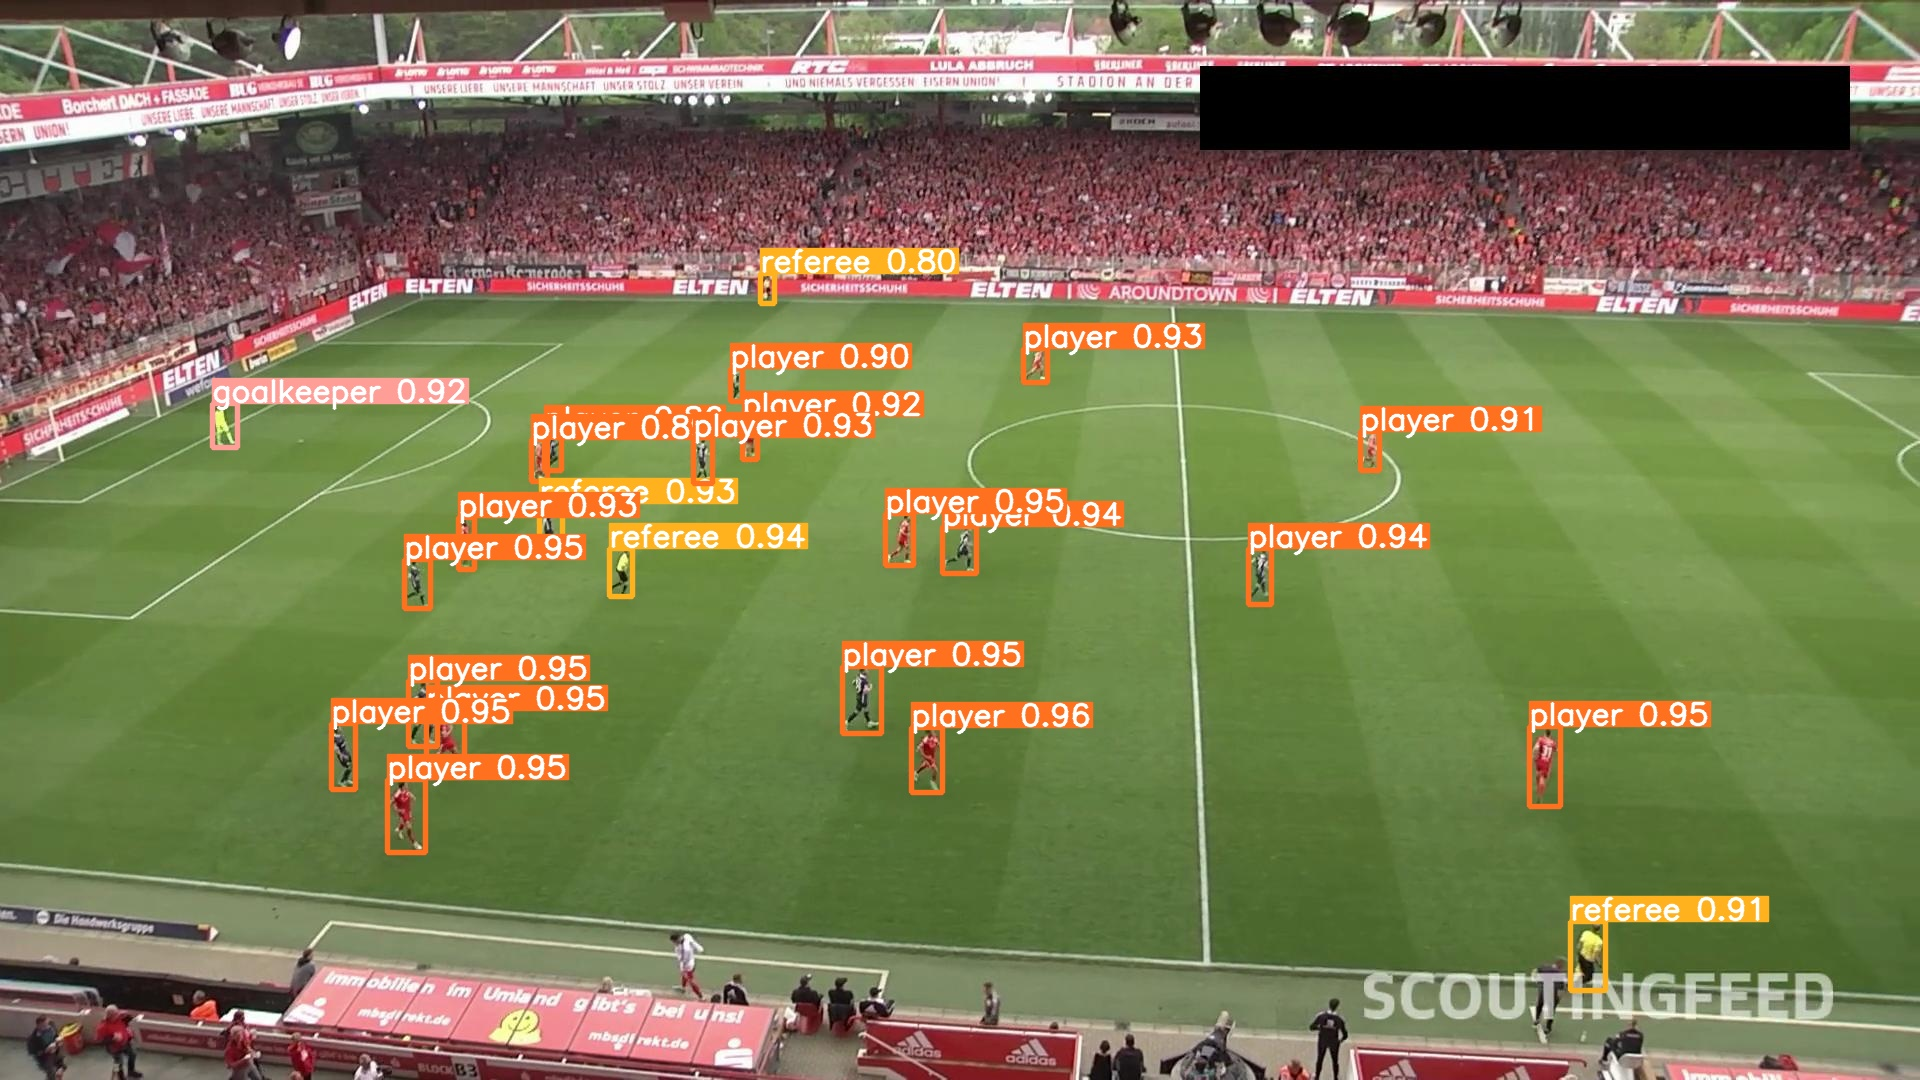

In [17]:
import glob
from IPython.display import Image, display

for imageName in list(Path('/content/yolov5/runs/detect/exp/').iterdir())[:1]:
    display(Image(filename=imageName))
    print("\n")

In [8]:
from google.colab import files

In [9]:
!zip -r /content/runs.zip /content/yolov5/runs/train/exp

  adding: content/yolov5/runs/train/exp/ (stored 0%)
  adding: content/yolov5/runs/train/exp/R_curve.png (deflated 10%)
  adding: content/yolov5/runs/train/exp/opt.yaml (deflated 49%)
  adding: content/yolov5/runs/train/exp/weights/ (stored 0%)
  adding: content/yolov5/runs/train/exp/weights/best.pt (deflated 8%)
  adding: content/yolov5/runs/train/exp/weights/last.pt (deflated 8%)
  adding: content/yolov5/runs/train/exp/F1_curve.png (deflated 8%)
  adding: content/yolov5/runs/train/exp/val_batch2_labels.jpg (deflated 5%)
  adding: content/yolov5/runs/train/exp/val_batch0_pred.jpg (deflated 1%)
  adding: content/yolov5/runs/train/exp/confusion_matrix.png (deflated 24%)
  adding: content/yolov5/runs/train/exp/hyp.yaml (deflated 45%)
  adding: content/yolov5/runs/train/exp/P_curve.png (deflated 11%)
  adding: content/yolov5/runs/train/exp/results.csv (deflated 84%)
  adding: content/yolov5/runs/train/exp/train_batch1.jpg (deflated 6%)
  adding: content/yolov5/runs/train/exp/results.png (

In [12]:
files.download("/content/runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>